<a href="https://colab.research.google.com/github/Lokesh-006/CodeAlpha_Tech_Intern/blob/main/Titanic_Classification_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

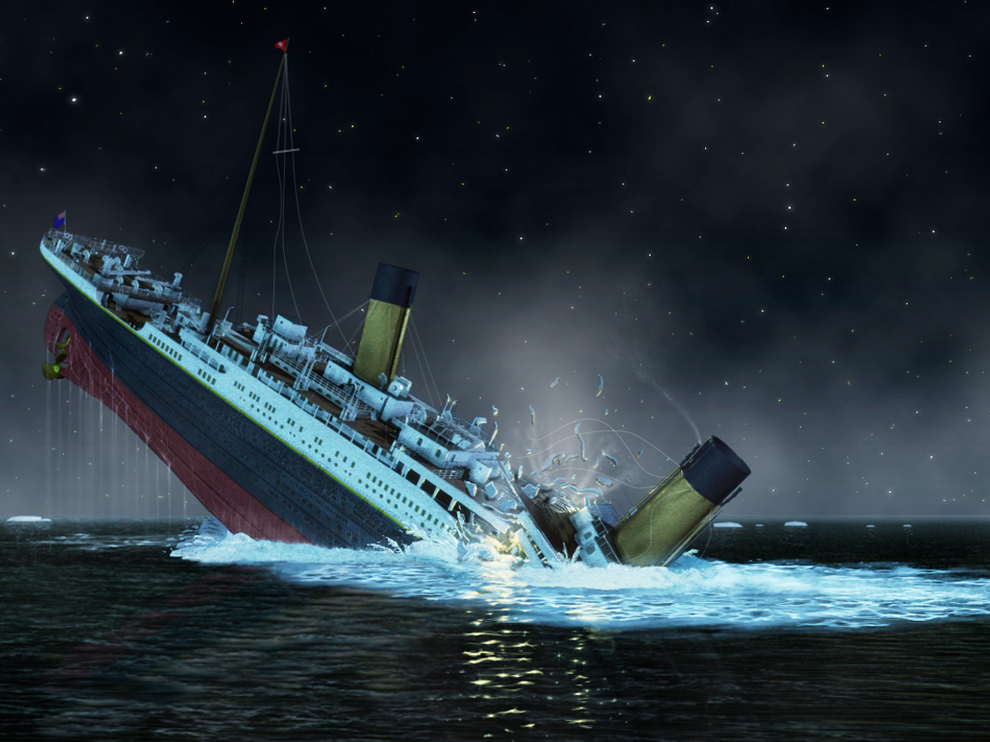

### Project Objective

The objective of this project is to develop a predictive model that accurately determines the survival likelihood of passengers on the Titanic based on key features such as age, gender, passenger class, fare, family size, and port of embarkation. By utilizing the Random Forest classifier, we aim to achieve a robust and reliable model that offers superior performance and high accuracy in predicting survival outcomes. This model will provide valuable insights into the factors that influenced survival during the Titanic disaster and demonstrate the effectiveness of ensemble learning techniques in classification tasks.

### Dataset Description

The dataset used for this project is the Titanic dataset, which contains detailed information about the passengers aboard the Titanic. The key features included in the dataset are:
- **Age**: The age of the passenger.
- **Sex**: The gender of the passenger (male or female).
- **Pclass**: The class in which the passenger traveled (1st, 2nd, or 3rd class).
- **Fare**: The fare paid by the passenger for the journey.
- **FamilySize**: The total number of family members traveling with the passenger, calculated as the sum of the number of siblings/spouses and the number of parents/children.
- **Embarked**: The port of embarkation where the passenger boarded the Titanic (C = Cherbourg; Q = Queenstown; S = Southampton).

By analyzing these features, the project aims to build a model that can predict whether a passenger survived the Titanic disaster, achieving an accuracy score of 0.821290. This project highlights the importance of feature selection and the power of ensemble methods in creating accurate and reliable predictive models.

# Importing Requirments.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Loading and Exlopration

In [3]:
train=pd.read_csv('/content/sample_data/train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


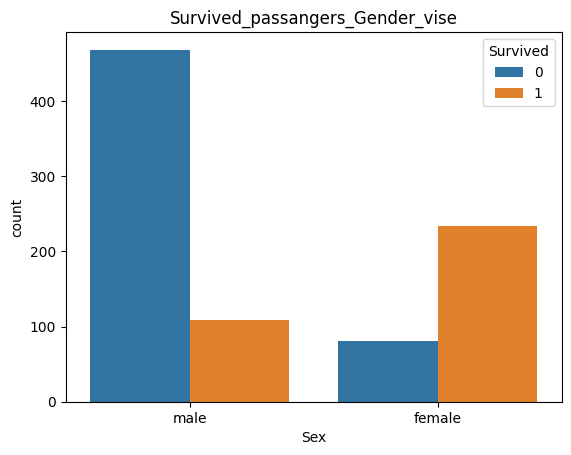

In [93]:
sns.countplot(x='Sex',data=train,hue='Survived')
plt.title('Survived_passangers_Gender_vise');

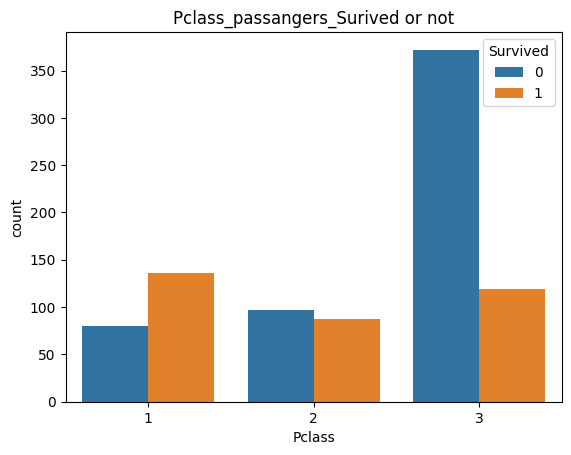

In [19]:
sns.countplot(x='Pclass',data=train,hue='Survived')
plt.title('Pclass_passangers_Surived or not');

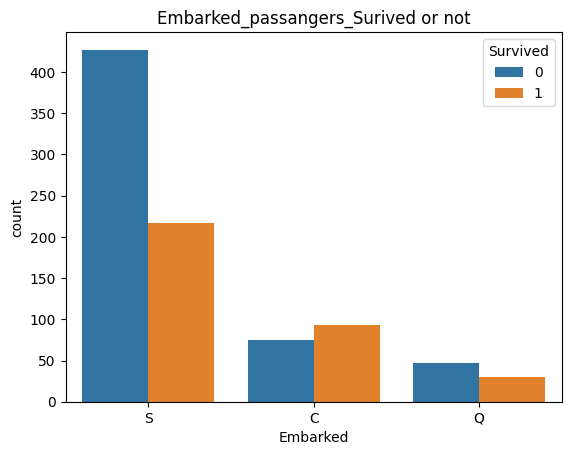

In [20]:
sns.countplot(x='Embarked',data=train,hue='Survived')
plt.title('Embarked_passangers_Surived or not');

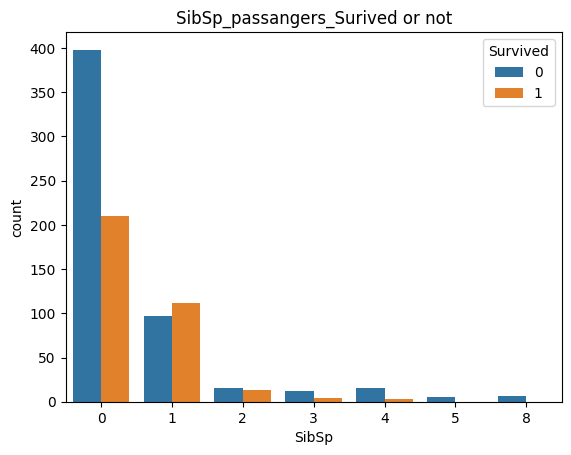

In [21]:
sns.countplot(x='SibSp',data=train,hue='Survived')
plt.title('SibSp_passangers_Surived or not');

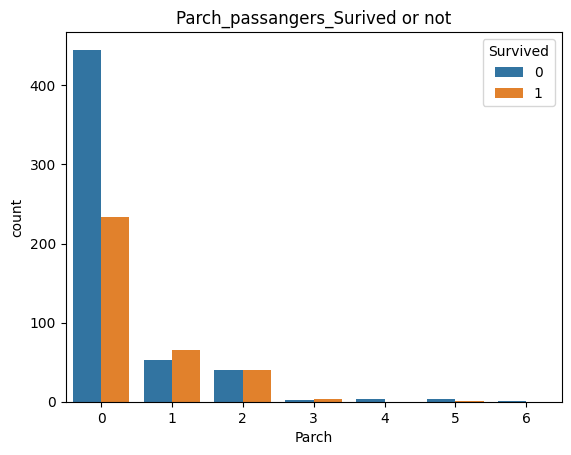

In [22]:
sns.countplot(x='Parch',data=train,hue='Survived')
plt.title('Parch_passangers_Surived or not');

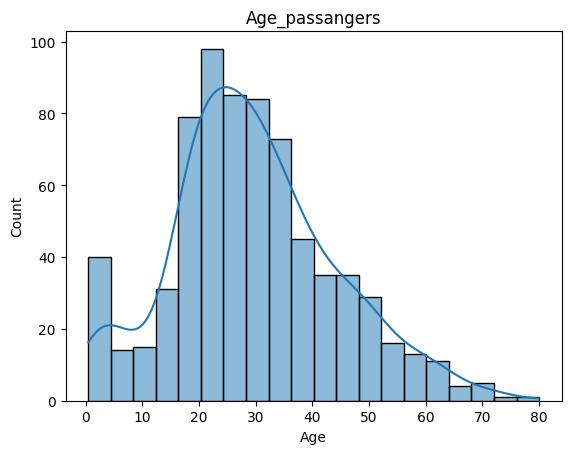

In [26]:
sns.histplot(x='Age',data=train,kde=True)
plt.title('Age_passangers');

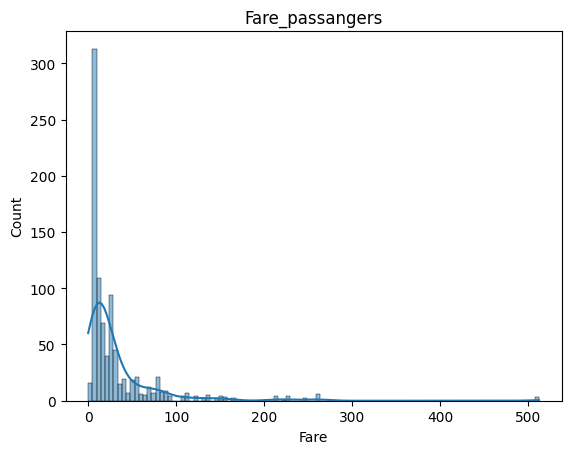

In [27]:
sns.histplot(x='Fare',data=train,kde=True)
plt.title('Fare_passangers');

Text(0.5, 1.0, 'Fare_passangers_Surived or not')

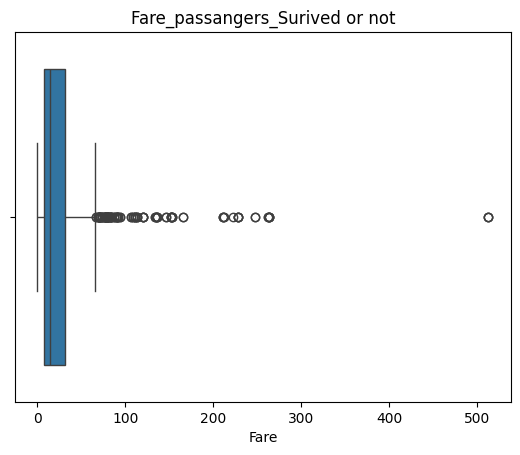

In [40]:
sns.boxplot(x='Fare',data=train)
plt.title('Fare_passangers_Surived or not')

### There are Outliers in the Feature 'Fare', But they can be negligible for this model Creation.

# Checking the missing Values and Handling the values and Imputation.

** If any Feature Contains More Than 50% of values are MIssing values.that data can not be useful we can Drop the Feature.

In [41]:
def Check_missing_data(train):
  missing_value=train.isnull().sum()/len(train)*100
  filtered_Data=missing_value[missing_value>0]
  if len(filtered_Data)==0:
    return('No missing value',missing_value)
  else:
    missing_data=pd.DataFrame({'missing_value':filtered_Data})
    return missing_data,missing_data.plot(kind='bar',figsize=(10,5),title='Missing Data')

(          missing_value
 Age           19.865320
 Cabin         77.104377
 Embarked       0.224467,
 <Axes: title={'center': 'Missing Data'}>)

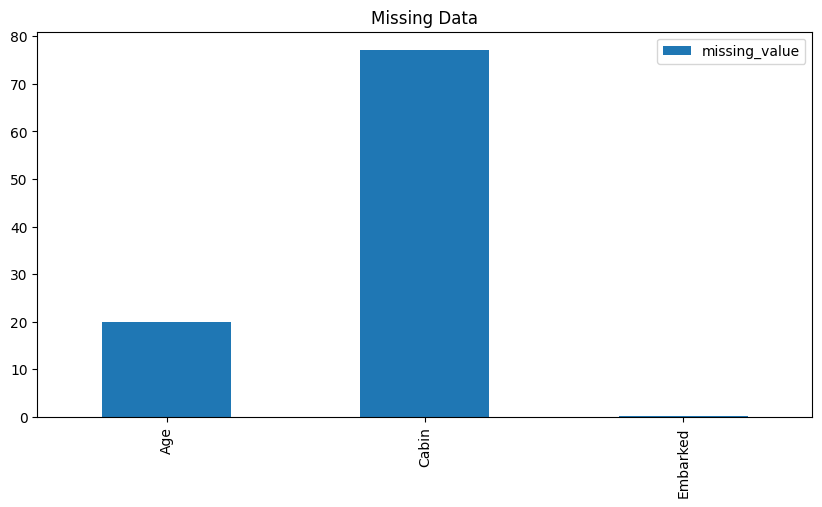

In [42]:
Check_missing_data(train)

## handling the Missing values.

In [43]:
def fill_missing_data(train):
  for col in train.columns:
    if train[col].dtype=='object' and (train[col].isnull().sum()/len(train[col])<0.50):
      train[col].fillna(train[col].mode()[0],inplace=True)
    elif train[col].dtype=='object' and (train[col].isnull().sum()/len(train[col])>0.50):
      train[col].fillna('Missing',inplace=True)
      train.drop(col,axis=1,inplace=True)
    else:
      train[col].fillna(train[col].mean(),inplace=True)


In [44]:
fill_missing_data(train)

In [45]:
Check_missing_data(train)

('No missing value',
 PassengerId    0.0
 Survived       0.0
 Pclass         0.0
 Name           0.0
 Sex            0.0
 Age            0.0
 SibSp          0.0
 Parch          0.0
 Ticket         0.0
 Fare           0.0
 Embarked       0.0
 dtype: float64)

# Features Selecting for Model Training.

In [50]:
def Remove_unuseful_features(train):
  try:
    train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return train.head()
  except:
    return train.head()


In [51]:
Remove_unuseful_features(train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [57]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier


In [53]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Feaure Engineering

In [54]:
train['FamilySize']=train['SibSp']+train['Parch']+1

In [55]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


# Preprocessing & Pipeline Making

In [58]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [59]:
Numeric_features=['Age','Fare','FamilySize']
Categorical_features=['Pclass','Sex','Embarked']

In [60]:
numeric_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),('scaler',StandardScaler())])

In [61]:
categorical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown='ignore'))])

In [62]:
preprocessor=ColumnTransformer(transformers=[('num',numeric_transformer,Numeric_features),('cat',categorical_transformer,Categorical_features)])

# ModelSelection And Model Training

# RandomforestClassifier_model

In [92]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',model)])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
pipeline.fit(X_train,y_train)
pipeline.predict(X_test)
print(accuracy_score(y_test,pipeline.predict(X_test)))
print(confusion_matrix(y_test,pipeline.predict(X_test)))
print(classification_report(y_test,pipeline.predict(X_test)))

0.8212290502793296
[[92 13]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# DecisionTreeClassifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=100)
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',model)])
pipeline.fit(X_train,y_train)
pipeline.predict(X_test)
print(accuracy_score(y_test,pipeline.predict(X_test)))
print(confusion_matrix(y_test,pipeline.predict(X_test)))
print(classification_report(y_test,pipeline.predict(X_test)))

0.7653631284916201
[[81 24]
 [18 56]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       105
           1       0.70      0.76      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



#  LogisticRegression

In [78]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=10,random_state=42)
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',model)])
pipeline.fit(X_train,y_train)
pipeline.predict(X_test)
print(accuracy_score(y_test,pipeline.predict(X_test)))
print(confusion_matrix(y_test,pipeline.predict(X_test)))
print(classification_report(y_test,pipeline.predict(X_test)))

0.7988826815642458
[[90 15]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



#  Support Vector Classifie (SVC)

In [80]:
from sklearn.svm import SVC
model=SVC(C=10,random_state=42,kernel='rbf')
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',model)])
pipeline.fit(X_train,y_train)
pipeline.predict(X_test)
print(accuracy_score(y_test,pipeline.predict(X_test)))
print(confusion_matrix(y_test,pipeline.predict(X_test)))
print(classification_report(y_test,pipeline.predict(X_test)))

0.8100558659217877
[[93 12]
 [22 52]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



# KNeighborsClassifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',model)])
pipeline.fit(X_train,y_train)
pipeline.predict(X_test)
print(accuracy_score(y_test,pipeline.predict(X_test)))
print(confusion_matrix(y_test,pipeline.predict(X_test)))
print(classification_report(y_test,pipeline.predict(X_test)))

0.8044692737430168
[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [85]:
model_vise_acuracy={'RandomForestClassifier':0.821,
                    'DecisionTreeClassifier':0.765,
                    'LogisticRegression':0.798,
                    'SVC':0.810,
                    'KNeighborsClassifier':0.804}

# Differnet Classification Models and Their Performance.

In [91]:
pd.DataFrame(model_vise_acuracy,index=['Accuracy']).T

,Accuracy
RandomForestClassifier,0.821
DecisionTreeClassifier,0.765
LogisticRegression,0.798
SVC,0.810
KNeighborsClassifier,0.804


# Conclusion

In my Titanic survival prediction project, I have chosen to use the Random Forest classifier because it offers superior performance and achieves a good model accuracy. By leveraging the features "Age", "Sex", "Pclass", "Fare", "FamilySize", and "Embarked", the model effectively predicts whether a passenger survived the Titanic disaster.

The Random Forest classifier is an ensemble method that combines multiple decision trees to improve predictive accuracy and control overfitting. This model has demonstrated an accuracy score of 0.821290 on the test dataset, indicating its robustness and reliability in handling this classification task.

**Key Features Used**:

  **Age:** The age of the passenger.

  **Sex:** The gender of the passenger.

  **Pclass**: The class in which the passenger traveled (1st, 2nd, or 3rd class).

  **Fare**: The fare paid by the passenger.
FamilySize: The total number of family members traveling with the passenger.

  **Embarked**: The port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).


By incorporating these features, the model captures significant factors that influenced survival during the Titanic disaster. The high accuracy score of 0.821290 reflects the model's effectiveness in making accurate predictions based on the provided data.